In [53]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr

sns.set_style("whitegrid")

In [2]:
#Supressing Warnings if any
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing data from cleaned CSV
Loan_df=pd.read_csv('.\loan.csv',sep=',', encoding = "ISO-8859-1")
Loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
print(Loan_df.shape)
Loan_df.info()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Null values percentage for all columns > 0
NA = round(Loan_df.isnull().sum() / len(Loan_df.index) * 100, 2)
NA[NA>0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [6]:
df=pd.DataFrame(Loan_df.loc[:, (NA < 90.00)])
NA = round(df.isnull().sum() / len(df.index) * 100, 2)
NA[NA>0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [7]:
# dropping the columns with high percentage of NA values
df.drop('mths_since_last_delinq', axis=1, inplace=True)
df.drop('desc', axis=1, inplace=True)

In [8]:
Columns = [ 'member_id', 'grade', 'url', 'funded_amnt', 'emp_title', 'earliest_cr_line', 'pymnt_plan',
               'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
               'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
               'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'collection_recovery_fee', 'inq_last_6mths',
               'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq']
for column in  Columns:
    df.drop(column, axis=1, inplace=True)
    df

In [9]:
#Title and Application type not required
df.drop('title', axis=1, inplace=True)
df.drop('application_type', axis=1, inplace=True)
df

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies
0,1077501,5000,4975.00000,36 months,10.65%,162.87,B2,10+ years,RENT,24000.00,...,Fully Paid,credit_card,860xx,AZ,27.65,0,3,0,83.70%,0.0
1,1077430,2500,2500.00000,60 months,15.27%,59.83,C4,< 1 year,RENT,30000.00,...,Charged Off,car,309xx,GA,1.00,0,3,0,9.40%,0.0
2,1077175,2400,2400.00000,36 months,15.96%,84.33,C5,10+ years,RENT,12252.00,...,Fully Paid,small_business,606xx,IL,8.72,0,2,0,98.50%,0.0
3,1076863,10000,10000.00000,36 months,13.49%,339.31,C1,10+ years,RENT,49200.00,...,Fully Paid,other,917xx,CA,20.00,0,10,0,21%,0.0
4,1075358,3000,3000.00000,60 months,12.69%,67.79,B5,1 year,RENT,80000.00,...,Current,other,972xx,OR,17.94,0,15,0,53.90%,0.0
5,1075269,5000,5000.00000,36 months,7.90%,156.46,A4,3 years,RENT,36000.00,...,Fully Paid,wedding,852xx,AZ,11.20,0,9,0,28.30%,0.0
6,1069639,7000,7000.00000,60 months,15.96%,170.08,C5,8 years,RENT,47004.00,...,Fully Paid,debt_consolidation,280xx,NC,23.51,0,7,0,85.60%,0.0
7,1072053,3000,3000.00000,36 months,18.64%,109.43,E1,9 years,RENT,48000.00,...,Fully Paid,car,900xx,CA,5.35,0,4,0,87.50%,0.0
8,1071795,5600,5600.00000,60 months,21.28%,152.39,F2,4 years,OWN,40000.00,...,Charged Off,small_business,958xx,CA,5.55,0,11,0,32.60%,0.0
9,1071570,5375,5350.00000,60 months,12.69%,121.45,B5,< 1 year,RENT,15000.00,...,Charged Off,other,774xx,TX,18.08,0,2,0,36.50%,0.0


In [10]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
id                      39717 non-null int64
loan_amnt               39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
sub_grade               39717 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
zip_code                39717 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
delinq_2yrs             39717 non-null int64
open_acc                39717 non-null int64
pub_rec          

In [11]:


# taking % of from credit utilization
df["revol_util"]=df["revol_util"].str.replace("%", "").astype("float64")
# taking % of from credit interest rate
df["int_rate"] = df["int_rate"].str.replace("%", "").astype("float64")

# taking Months value from term
df["term"] = df["term"].str.replace(" months", "").astype("int64")

#There are 50 null values with mean
df.loc[df.revol_util.isnull(),'revol_util'] =  df.revol_util.mean()



# Column emp_length has substring '+', '<', ‘years’ strip this.

df["emp_length"] = df["emp_length"].str.replace("< 1", "0")
df["emp_length"] = df["emp_length"].str.replace("n/a", "NAN")
intab = "+years"
outtab = "      "
trantab = str.maketrans(intab, outtab)
df["emp_length"] = df["emp_length"].str.translate(trantab).astype("float64")
df.emp_length.fillna(df.emp_length.mean(),inplace = True)
df['emp_length'] = round(df['emp_length'], 2)


In [12]:
# Convert dates to python datetime object.

df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%y")
df['issue_year'] = df['issue_d'].dt.year
df['issue_mon'] = df['issue_d'].dt.month
df

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,issue_year,issue_mon
0,1077501,5000,4975.00000,36,10.65,162.87,B2,10.0,RENT,24000.00,...,860xx,AZ,27.65,0,3,0,83.70,0.0,2011,12
1,1077430,2500,2500.00000,60,15.27,59.83,C4,0.0,RENT,30000.00,...,309xx,GA,1.00,0,3,0,9.40,0.0,2011,12
2,1077175,2400,2400.00000,36,15.96,84.33,C5,10.0,RENT,12252.00,...,606xx,IL,8.72,0,2,0,98.50,0.0,2011,12
3,1076863,10000,10000.00000,36,13.49,339.31,C1,10.0,RENT,49200.00,...,917xx,CA,20.00,0,10,0,21.00,0.0,2011,12
4,1075358,3000,3000.00000,60,12.69,67.79,B5,1.0,RENT,80000.00,...,972xx,OR,17.94,0,15,0,53.90,0.0,2011,12
5,1075269,5000,5000.00000,36,7.90,156.46,A4,3.0,RENT,36000.00,...,852xx,AZ,11.20,0,9,0,28.30,0.0,2011,12
6,1069639,7000,7000.00000,60,15.96,170.08,C5,8.0,RENT,47004.00,...,280xx,NC,23.51,0,7,0,85.60,0.0,2011,12
7,1072053,3000,3000.00000,36,18.64,109.43,E1,9.0,RENT,48000.00,...,900xx,CA,5.35,0,4,0,87.50,0.0,2011,12
8,1071795,5600,5600.00000,60,21.28,152.39,F2,4.0,OWN,40000.00,...,958xx,CA,5.55,0,11,0,32.60,0.0,2011,12
9,1071570,5375,5350.00000,60,12.69,121.45,B5,0.0,RENT,15000.00,...,774xx,TX,18.08,0,2,0,36.50,0.0,2011,12


In [13]:
#Rounding amount invested and installement columns because of 4 zeroes
df["funded_amnt_inv"] = round(df["funded_amnt_inv"], 2)
df["installment"] = round(df["installment"], 2)
df

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,issue_year,issue_mon
0,1077501,5000,4975.00,36,10.65,162.87,B2,10.0,RENT,24000.00,...,860xx,AZ,27.65,0,3,0,83.70,0.0,2011,12
1,1077430,2500,2500.00,60,15.27,59.83,C4,0.0,RENT,30000.00,...,309xx,GA,1.00,0,3,0,9.40,0.0,2011,12
2,1077175,2400,2400.00,36,15.96,84.33,C5,10.0,RENT,12252.00,...,606xx,IL,8.72,0,2,0,98.50,0.0,2011,12
3,1076863,10000,10000.00,36,13.49,339.31,C1,10.0,RENT,49200.00,...,917xx,CA,20.00,0,10,0,21.00,0.0,2011,12
4,1075358,3000,3000.00,60,12.69,67.79,B5,1.0,RENT,80000.00,...,972xx,OR,17.94,0,15,0,53.90,0.0,2011,12
5,1075269,5000,5000.00,36,7.90,156.46,A4,3.0,RENT,36000.00,...,852xx,AZ,11.20,0,9,0,28.30,0.0,2011,12
6,1069639,7000,7000.00,60,15.96,170.08,C5,8.0,RENT,47004.00,...,280xx,NC,23.51,0,7,0,85.60,0.0,2011,12
7,1072053,3000,3000.00,36,18.64,109.43,E1,9.0,RENT,48000.00,...,900xx,CA,5.35,0,4,0,87.50,0.0,2011,12
8,1071795,5600,5600.00,60,21.28,152.39,F2,4.0,OWN,40000.00,...,958xx,CA,5.55,0,11,0,32.60,0.0,2011,12
9,1071570,5375,5350.00,60,12.69,121.45,B5,0.0,RENT,15000.00,...,774xx,TX,18.08,0,2,0,36.50,0.0,2011,12


In [14]:
## fixing zip code to proper formate.
Loan_df["zip_code"] = Loan_df["zip_code"].str.replace("xx", "")
Loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Analysis

In [15]:
def bar_chart(df, x, y, width, height, title='', xlabel='', ylabel='', legend=None, showBarVals=False):
    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults() 
    
    # Set figure size
    plt.figure(figsize=(width, height))
    
    # Plot bar chart of data frame 
    ax = sns.barplot(x=x, y=y, data=df)
    
 
    if xlabel.strip():
        plt.xlabel(xlabel)
    
    if ylabel.strip():    
        plt.ylabel(ylabel)
    
    if legend is not None:
        plt.legend(legend)
    
    if title.strip():
        plt.title(title)
        
    plt.show()

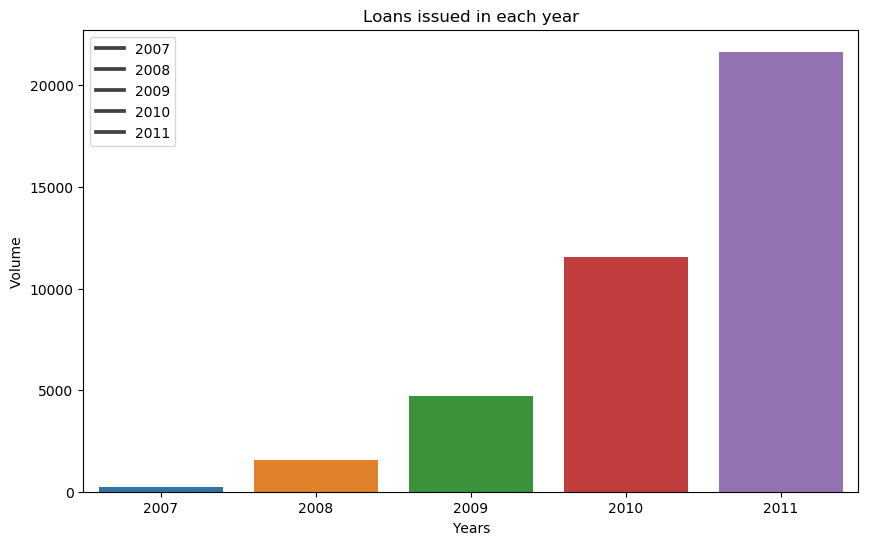

In [16]:
issue_y = df.groupby(df.issue_d.dt.year).size().reset_index(name='Volume')
bar_chart(issue_y, "issue_d", "Volume", 10, 6,
               'Loans issued in each year',
               'Years', 'Volume', issue_y['issue_d'],
              True)


In [17]:
def Analysis(yy,title):

    print(pd.crosstab(df[yy],df['loan_status']).apply(lambda r: (r/r.sum())*100, axis=1))

    print(pd.pivot_table(df, values=["id"], index=[yy],columns=["loan_status"], 
                           aggfunc=len, margins=True, dropna=True,fill_value=0))

    fig, axes = plt.subplots(figsize=(25, 10), sharey=True)
    ax = sns.countplot(x=yy, hue='loan_status', data=df, palette="Set2")
    ax.set_title(title)

    fig, axes = plt.subplots(figsize=(25, 10), sharey=True)
    df1 = df.groupby('loan_status')[yy].value_counts(ascending=False).unstack(level=0).reset_index()
    df1['Charged Off'].fillna(value=0, inplace=True)
    df1['Charged_Off_Percent'] = df1['Charged Off'] * 100 /(df1['Charged Off'] + df1['Fully Paid'])
    df1['Fully_Paid_Percent'] = df1['Fully Paid'] * 100 /(df1['Charged Off'] + df1['Fully Paid'])
    df1 = df1.sort_values(by='Charged_Off_Percent', ascending=False)
    sns.barplot(x=yy, y="Charged_Off_Percent", data=df1)   
    plt.xlabel(title)
    plt.ylabel('Charged off percentage')

In [18]:
Analysis('issue_year','Year Loan was issued')

loan_status  Charged Off  Current  Fully Paid
issue_year                                   
2007           17.928287  0.00000   82.071713
2008           15.813060  0.00000   84.186940
2009           12.595420  0.00000   87.404580
2010           12.877211  0.00000   87.122789
2011           15.035094  5.26413   79.700776
                     id                          
loan_status Charged Off Current Fully Paid    All
issue_year                                       
2007                 45       0        206    251
2008                247       0       1315   1562
2009                594       0       4122   4716
2010               1485       0      10047  11532
2011               3256    1140      17260  21656
All                5627    1140      32950  39717


In [19]:
Analysis('issue_mon','Month Loan was issued')

loan_status  Charged Off   Current  Fully Paid
issue_mon                                     
1              13.493064  0.000000   86.506936
2              12.298558  0.000000   87.701442
3              12.890045  0.037147   87.072808
4              13.055752  0.105857   86.838391
5              15.538513  2.667556   81.793931
6              14.730101  3.019213   82.250686
7              13.780207  3.596087   82.623705
8              13.303013  3.695281   83.001706
9              14.994518  4.111842   80.893640
10             14.743264  4.397560   80.859176
11             14.350852  3.863691   81.785457
12             15.294383  4.917663   79.787954
                     id                          
loan_status Charged Off Current Fully Paid    All
issue_mon                                        
1                   321       0       2058   2379
2                   290       0       2068   2358
3                   347       1       2344   2692
4                   370       3       2461

In [21]:
Analysis('verification_status','Verification Status')

loan_status          Charged Off   Current  Fully Paid
verification_status                                   
Not Verified           12.658826  1.341528   85.999645
Source Verified        14.358666  3.104035   82.537298
Verified               16.012179  4.707627   79.280194
                             id                          
loan_status         Charged Off Current Fully Paid    All
verification_status                                      
Not Verified               2142     227      14552  16921
Source Verified            1434     310       8243   9987
Verified                   2051     603      10155  12809
All                        5627    1140      32950  39717


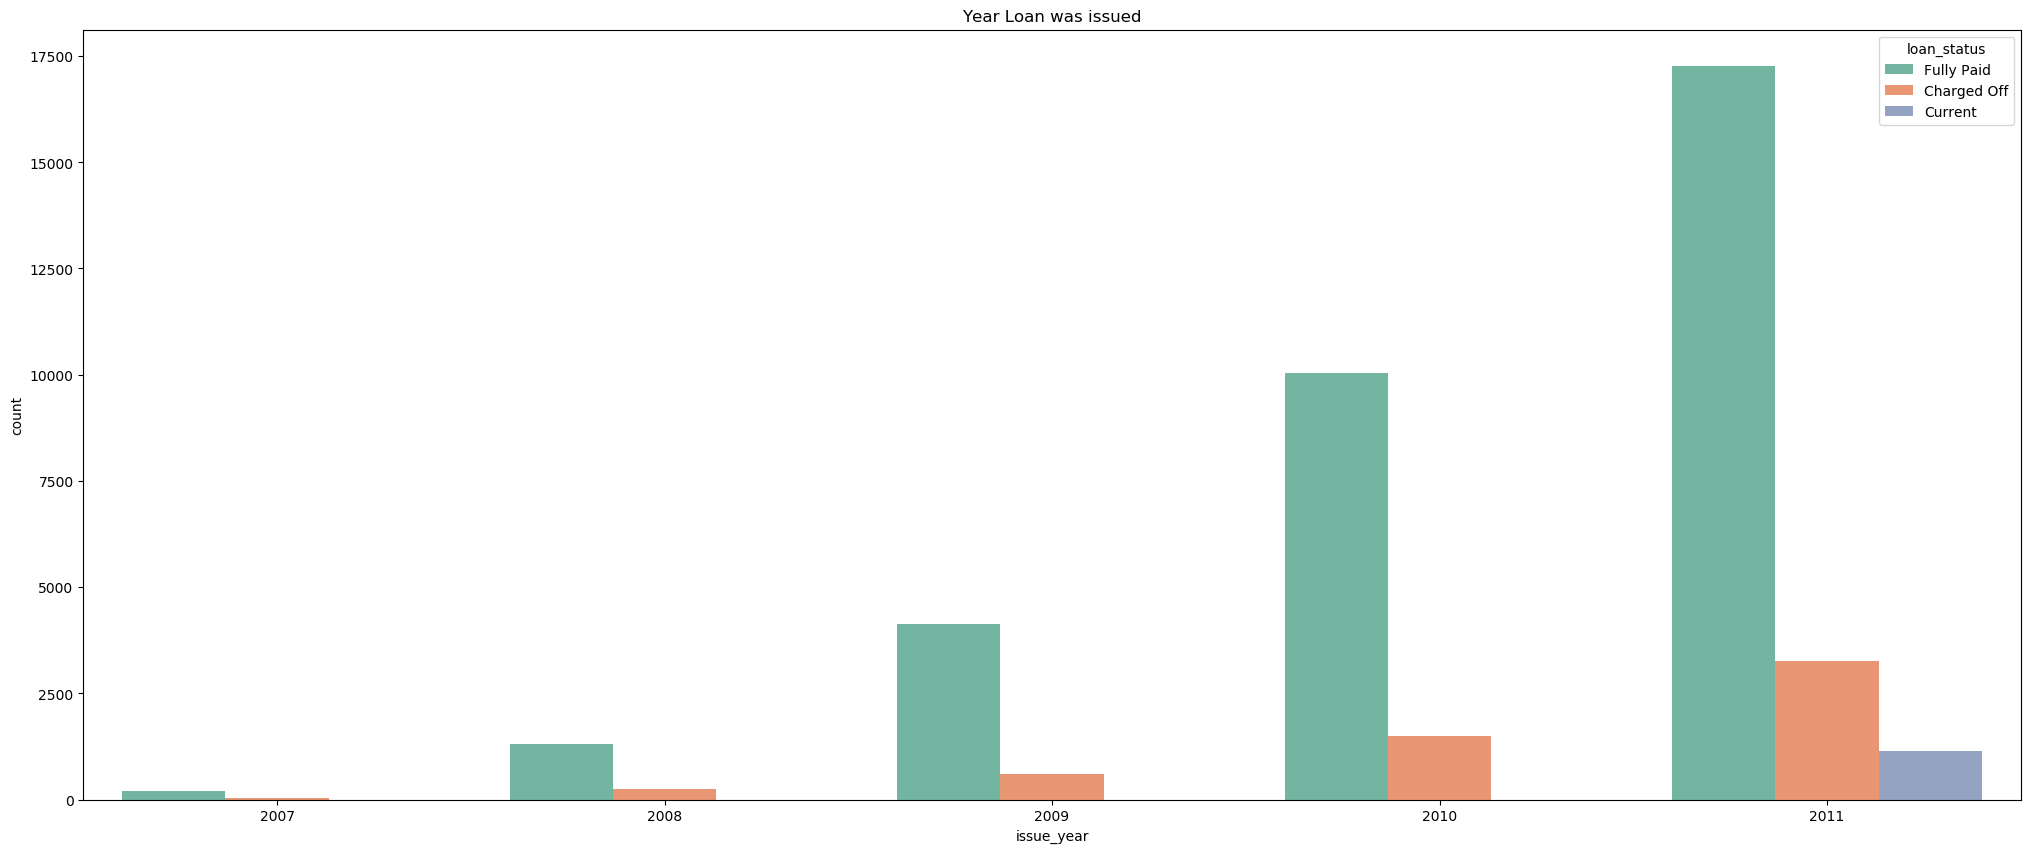

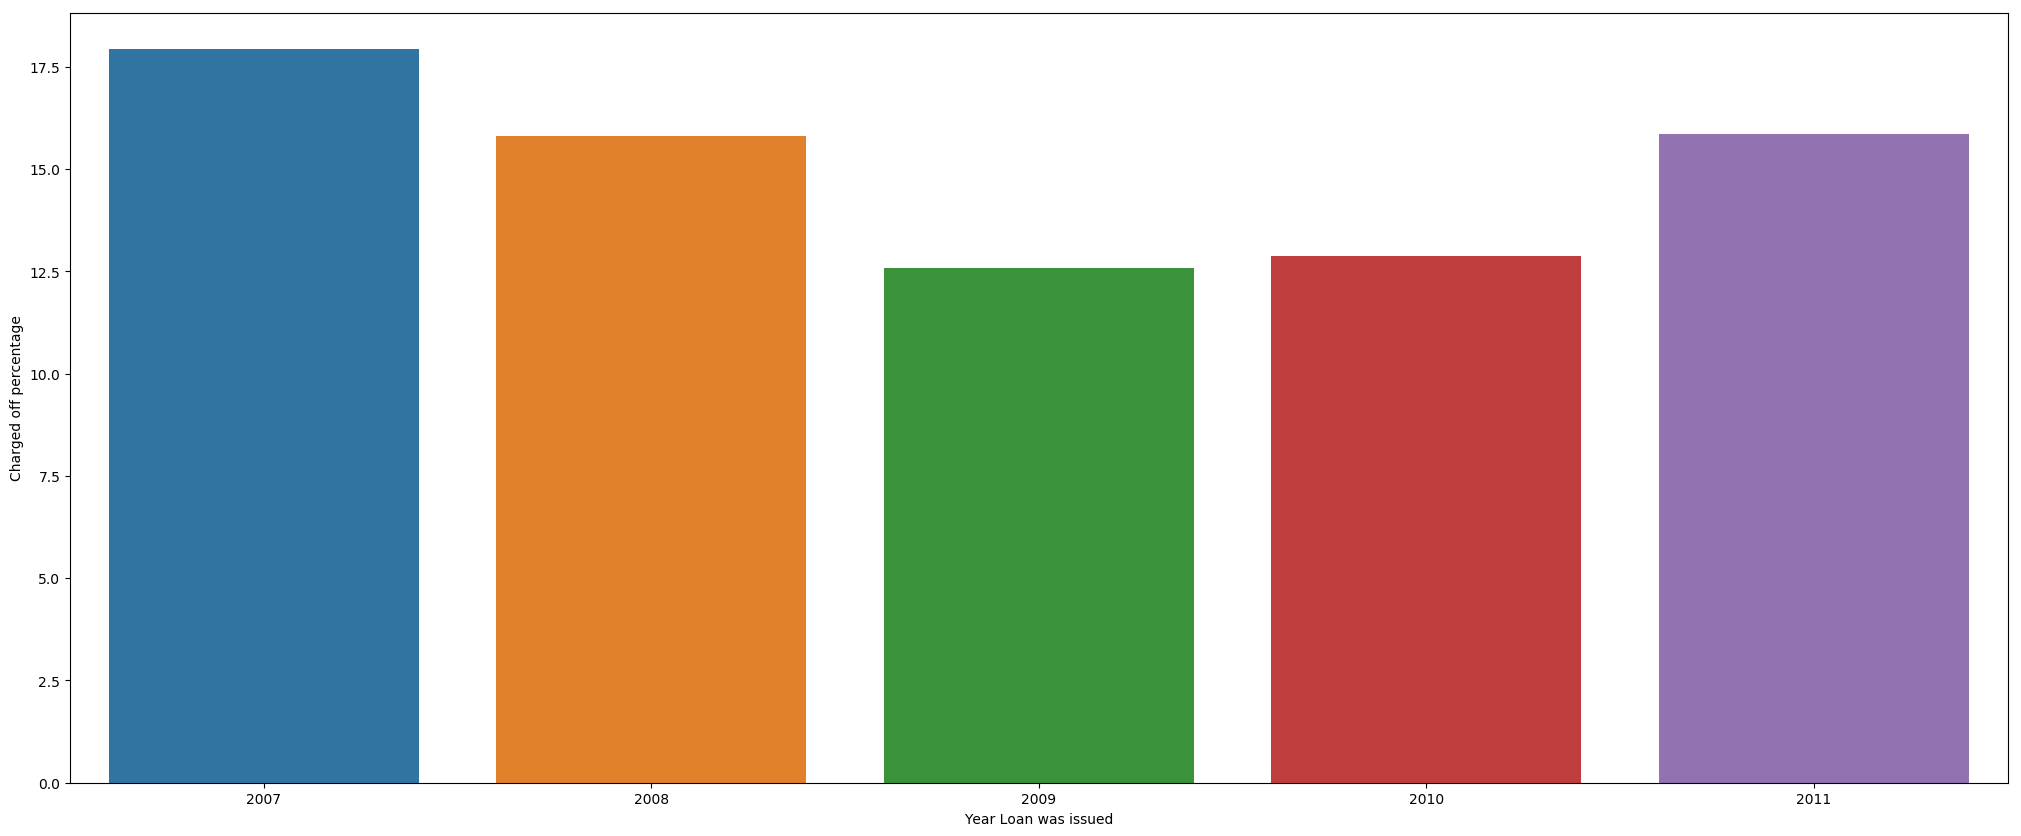

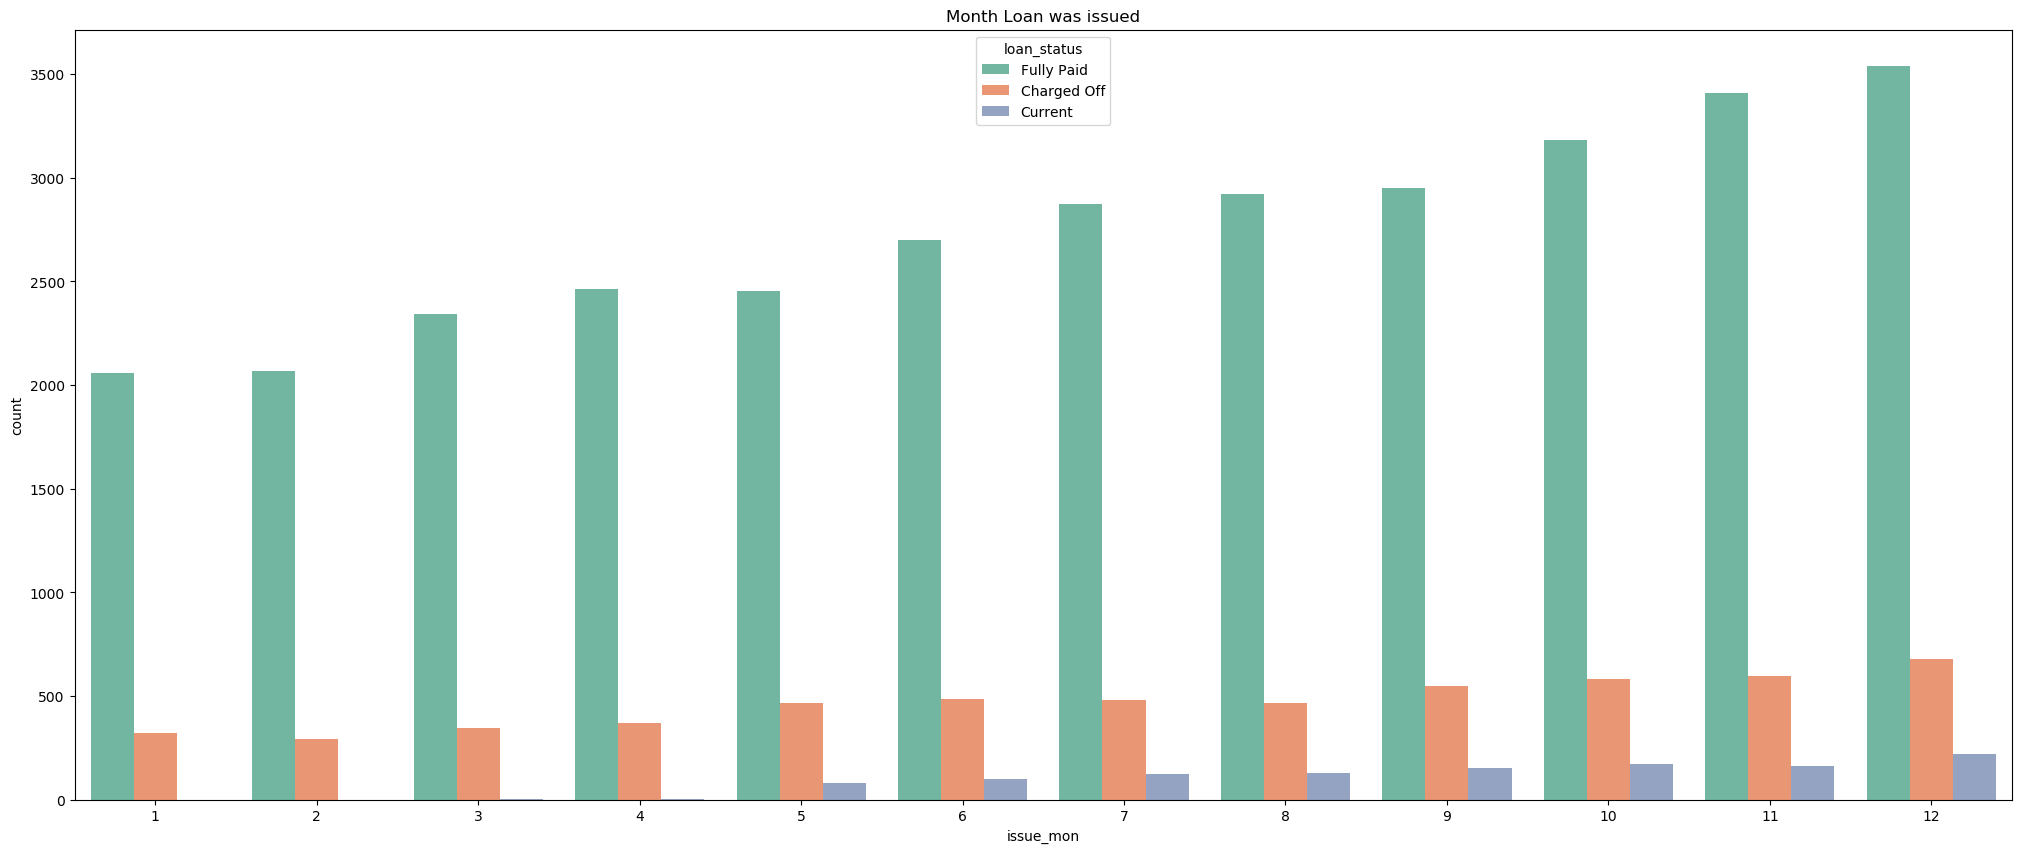

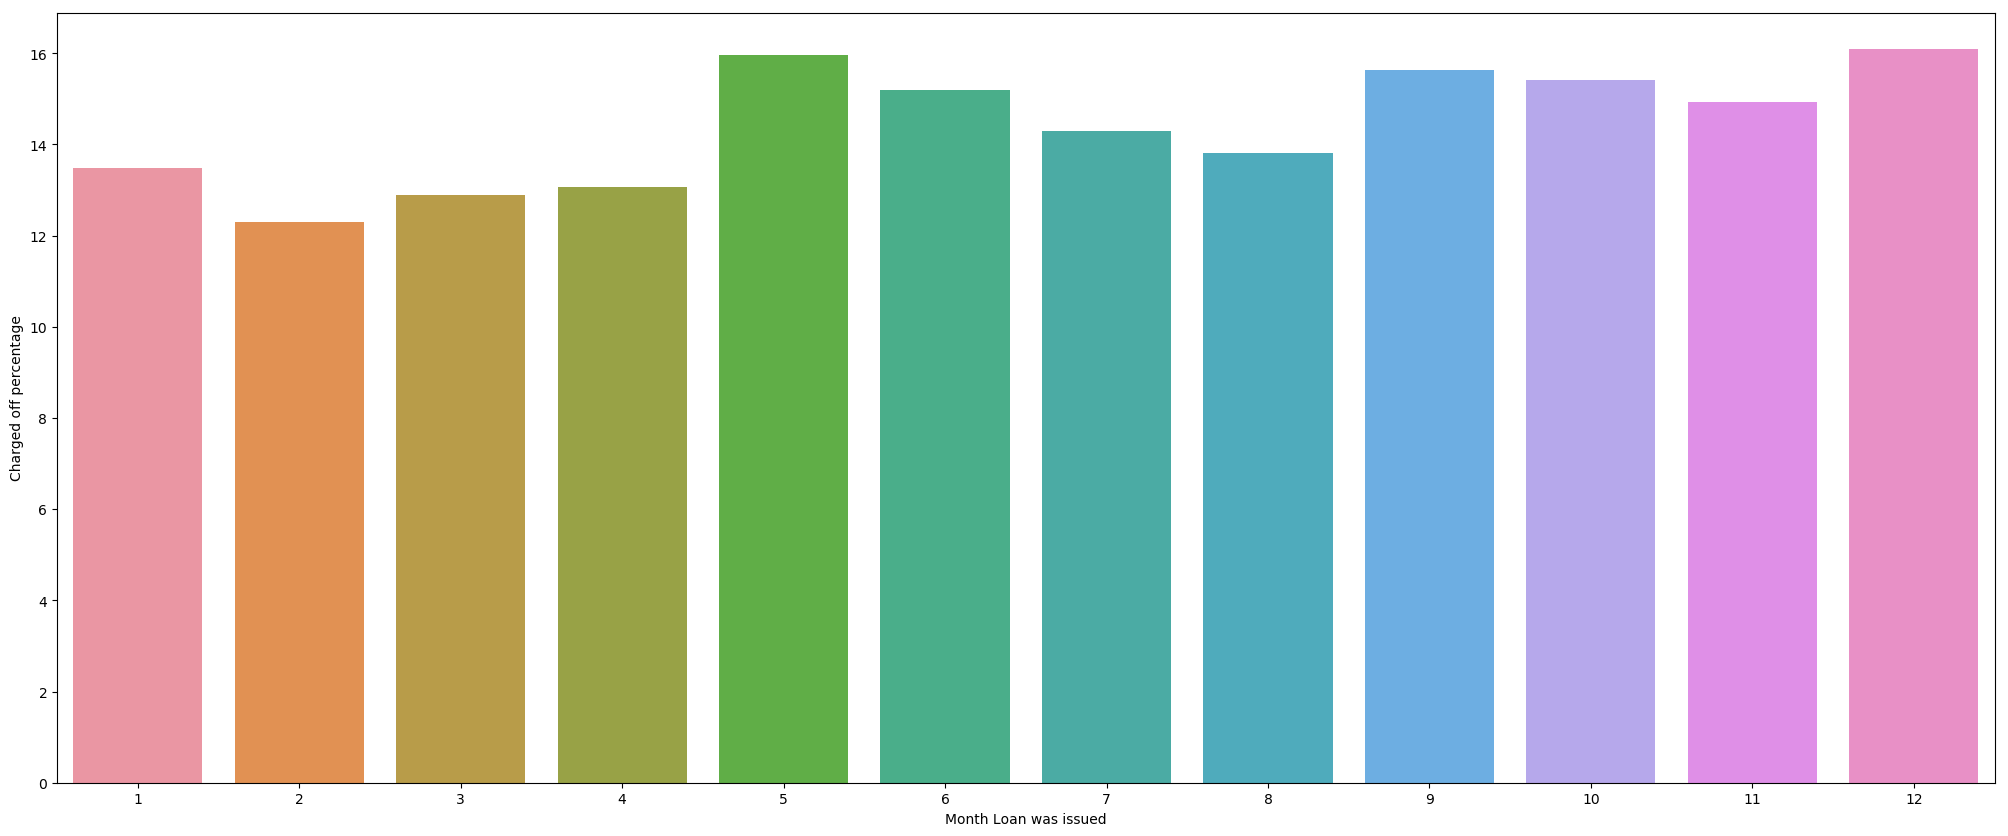

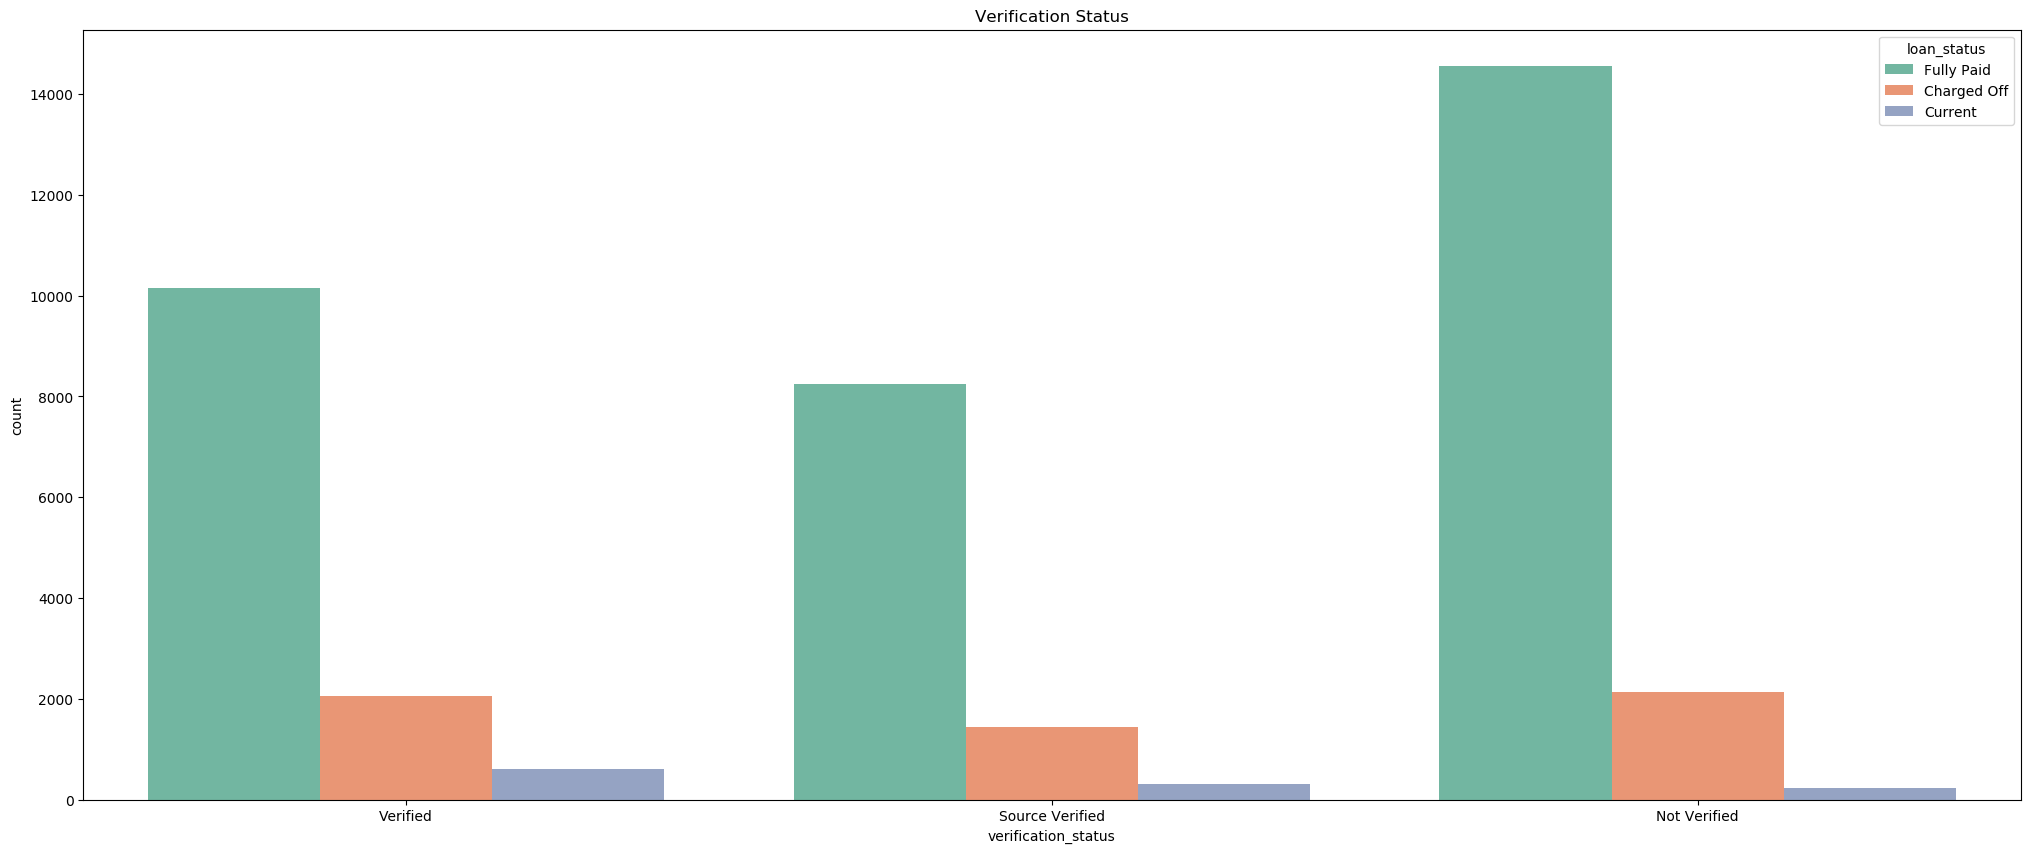

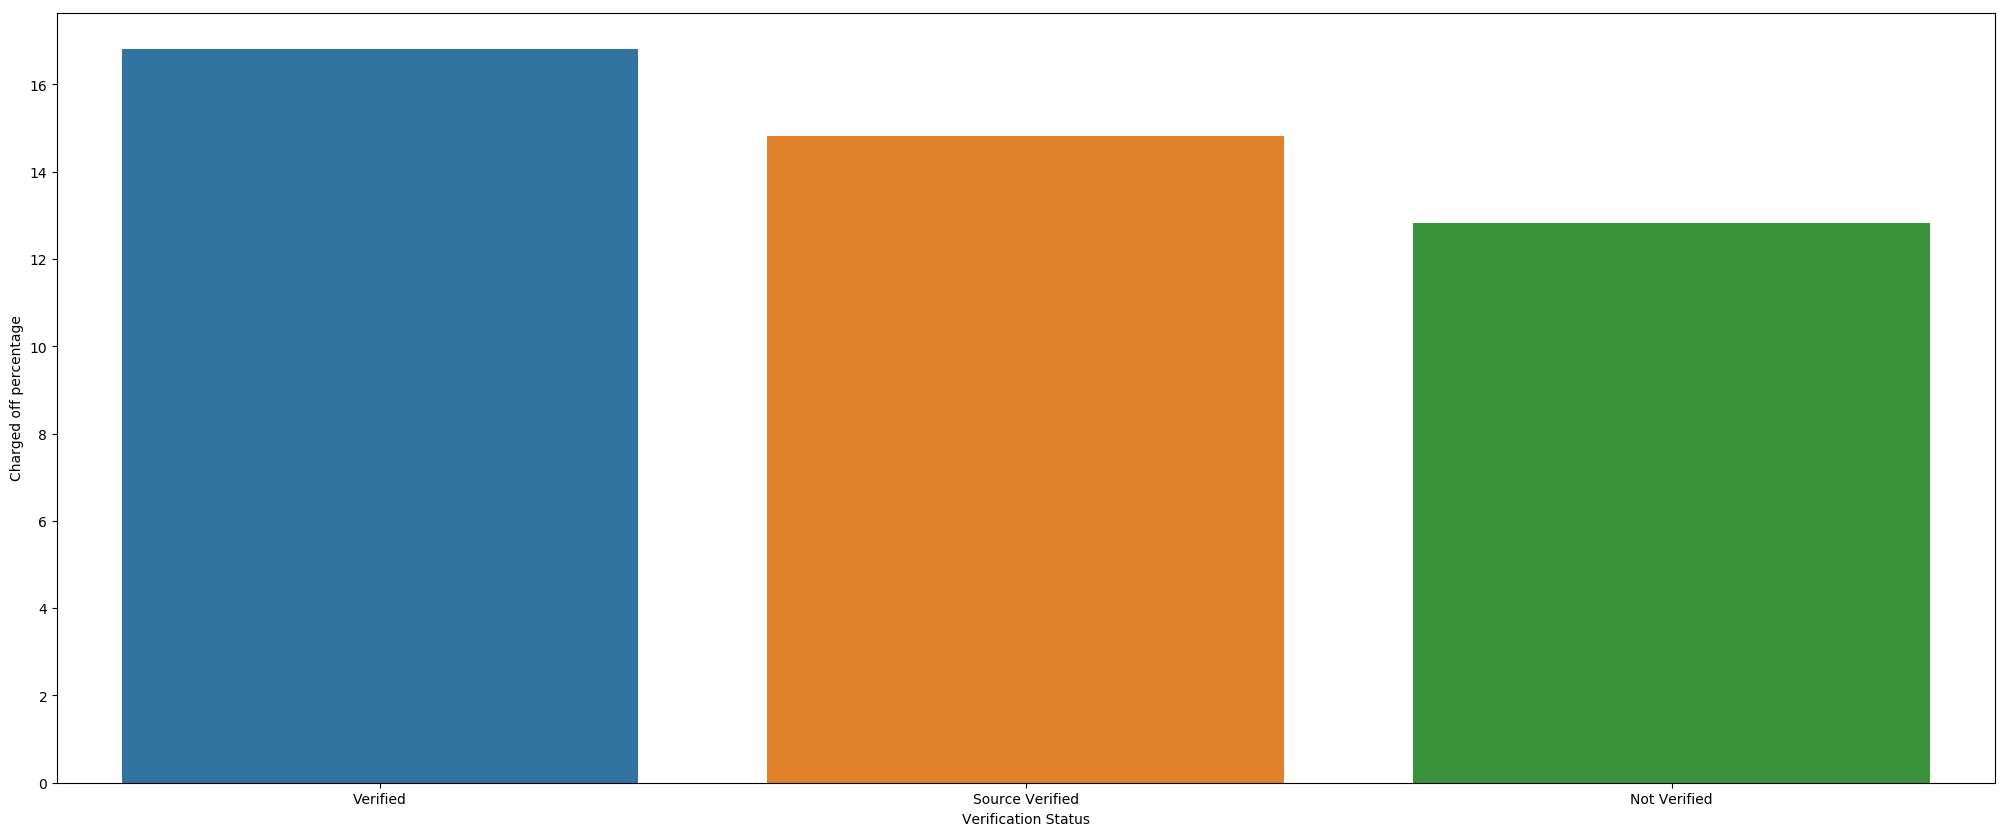

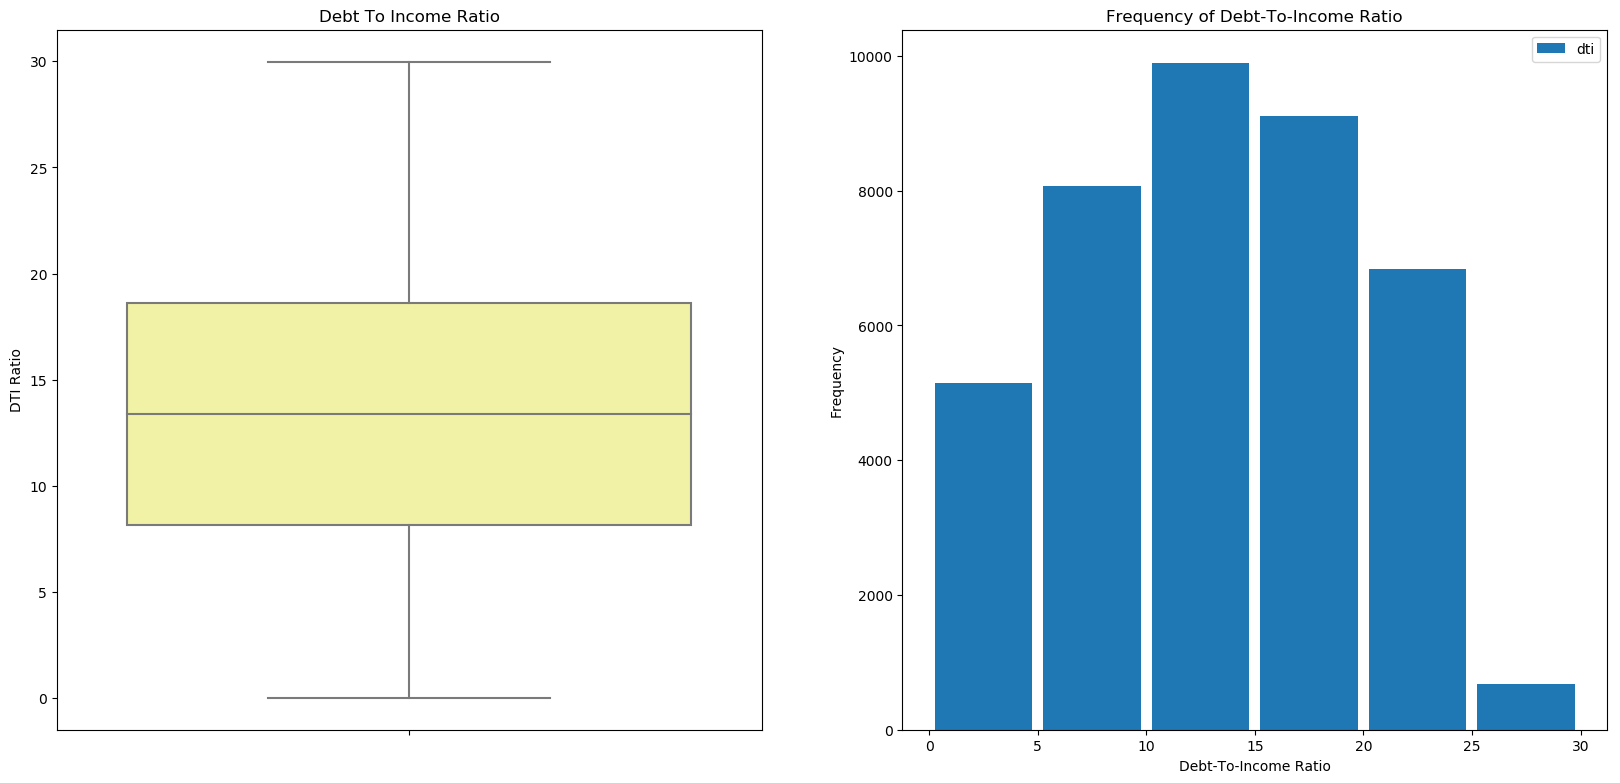

In [24]:
# Debt-To-Income Ratio(dti) is the percentage of a consumer's monthly gross income that goes 
# toward paying debts excluding mortgage and the requested LC loan

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
ax = sns.boxplot(y='dti', data=df, palette='terrain_r')
plt.ylabel('DTI Ratio')
plt.title('Debt To Income Ratio')

#Frequency Chart 
dti = df['dti']
legend = ['dti']
plt.subplot(2,2,2)
plt.hist([dti], bins=6, rwidth=0.9)
plt.xlabel("Debt-To-Income Ratio")
plt.ylabel("Frequency")
plt.legend(legend)
plt.xticks(np.arange(min(dti), max(dti)+5, 5))
plt.title('Frequency of Debt-To-Income Ratio')
plt.show()

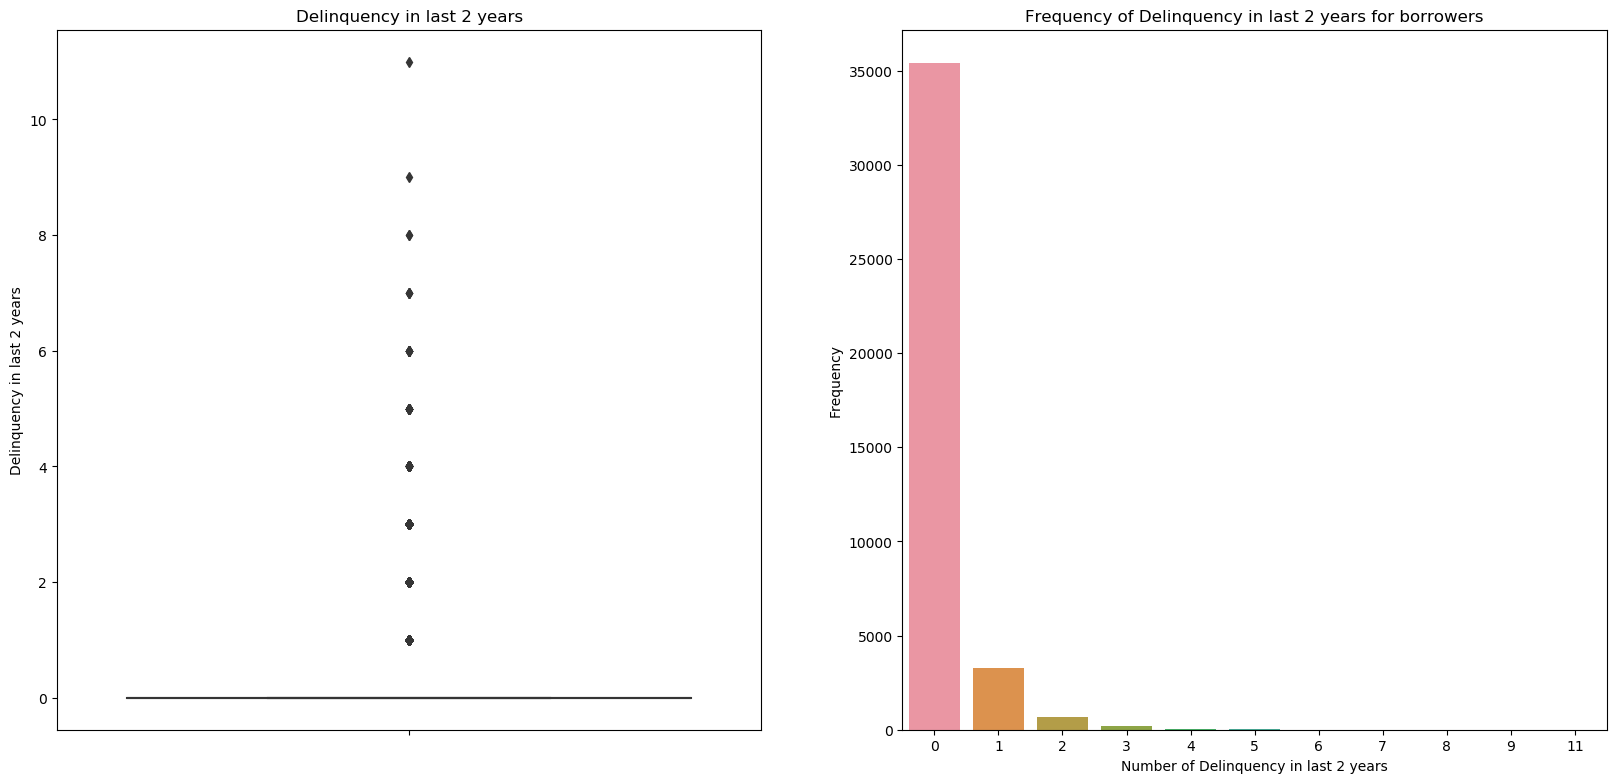

In [25]:
# Delinquency in past 2 Years(delinq_2yrs) is The number of 30+ days past-due incidences of delinquency
# ( failure to make a required payment )in the borrower's credit file for the past 2 years

#plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
ax = sns.boxplot(y='delinq_2yrs', data=df, palette='viridis')
plt.ylabel('Delinquency in last 2 years')
plt.title('Delinquency in last 2 years')

#Frequency Chart 
delinq_2yrs_values = pd.DataFrame(df['delinq_2yrs'].value_counts())
plt.subplot(2,2,2)
ax = sns.barplot(x=delinq_2yrs_values.index, y="delinq_2yrs", data=delinq_2yrs_values)

plt.xlabel("Number of Delinquency in last 2 years")
plt.ylabel("Frequency")
plt.title('Frequency of Delinquency in last 2 years for borrowers')
plt.show()

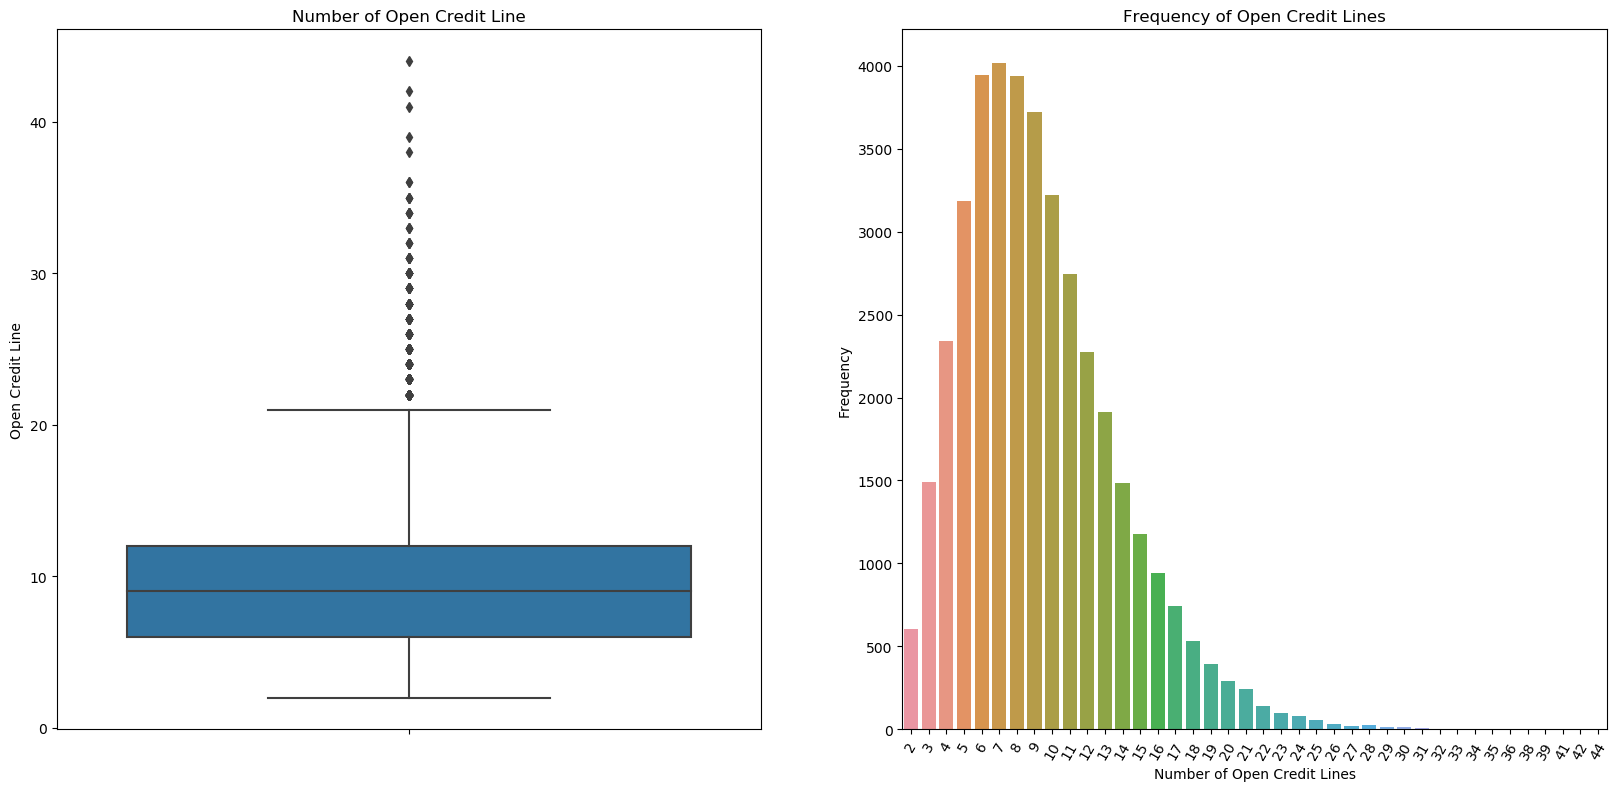

In [26]:
# Number of open credit lines in the borrower's credit file(open_acc)

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.boxplot(y=df['open_acc'])
plt.ylabel('Open Credit Line')
plt.title('Number of Open Credit Line')

#Frequency Chart 
open_acc_values = pd.DataFrame(df['open_acc'].value_counts())
plt.subplot(2,2,2)
ax = sns.barplot(x=open_acc_values.index, y="open_acc", data=open_acc_values)

plt.xlabel("Number of Open Credit Lines")
plt.ylabel("Frequency")
plt.title('Frequency of Open Credit Lines')
plt.xticks(rotation=60)
plt.show()

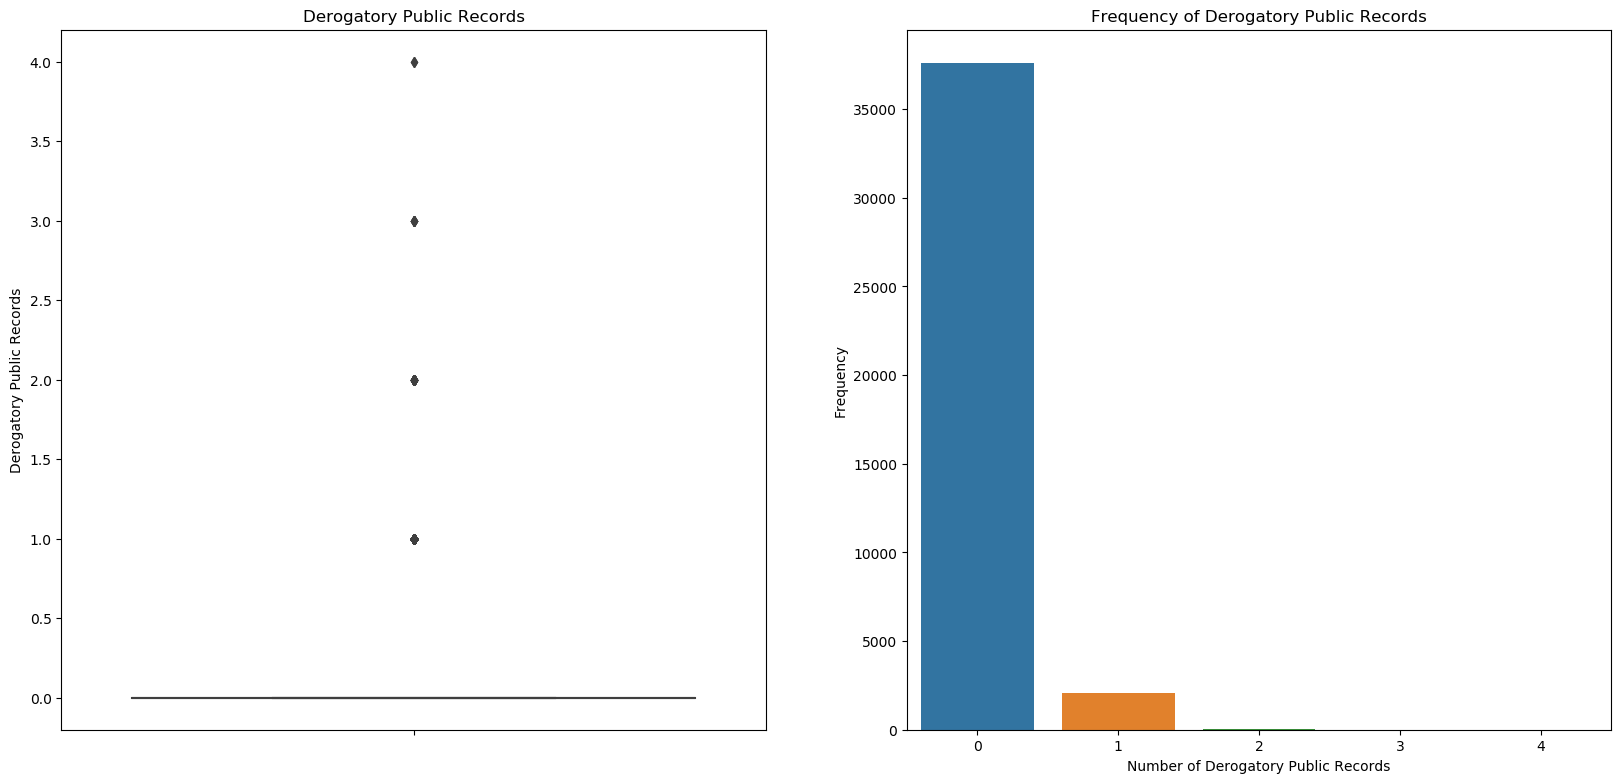

In [27]:
# Number of derogatory public records(pub_rec)
# Public records and collections are derogatory items in credit report because they all reflect financial obligations
# that were not paid as agreed

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.boxplot(y=df['pub_rec'])
plt.ylabel('Derogatory Public Records')
plt.title('Derogatory Public Records')

#Frequency Chart 
pub_rec_values = pd.DataFrame(df['pub_rec'].value_counts())
plt.subplot(2,2,2)
ax = sns.barplot(x=pub_rec_values.index, y="pub_rec", data=pub_rec_values)
plt.xlabel("Number of Derogatory Public Records")
plt.ylabel("Frequency")
plt.title('Frequency of Derogatory Public Records')
plt.show()

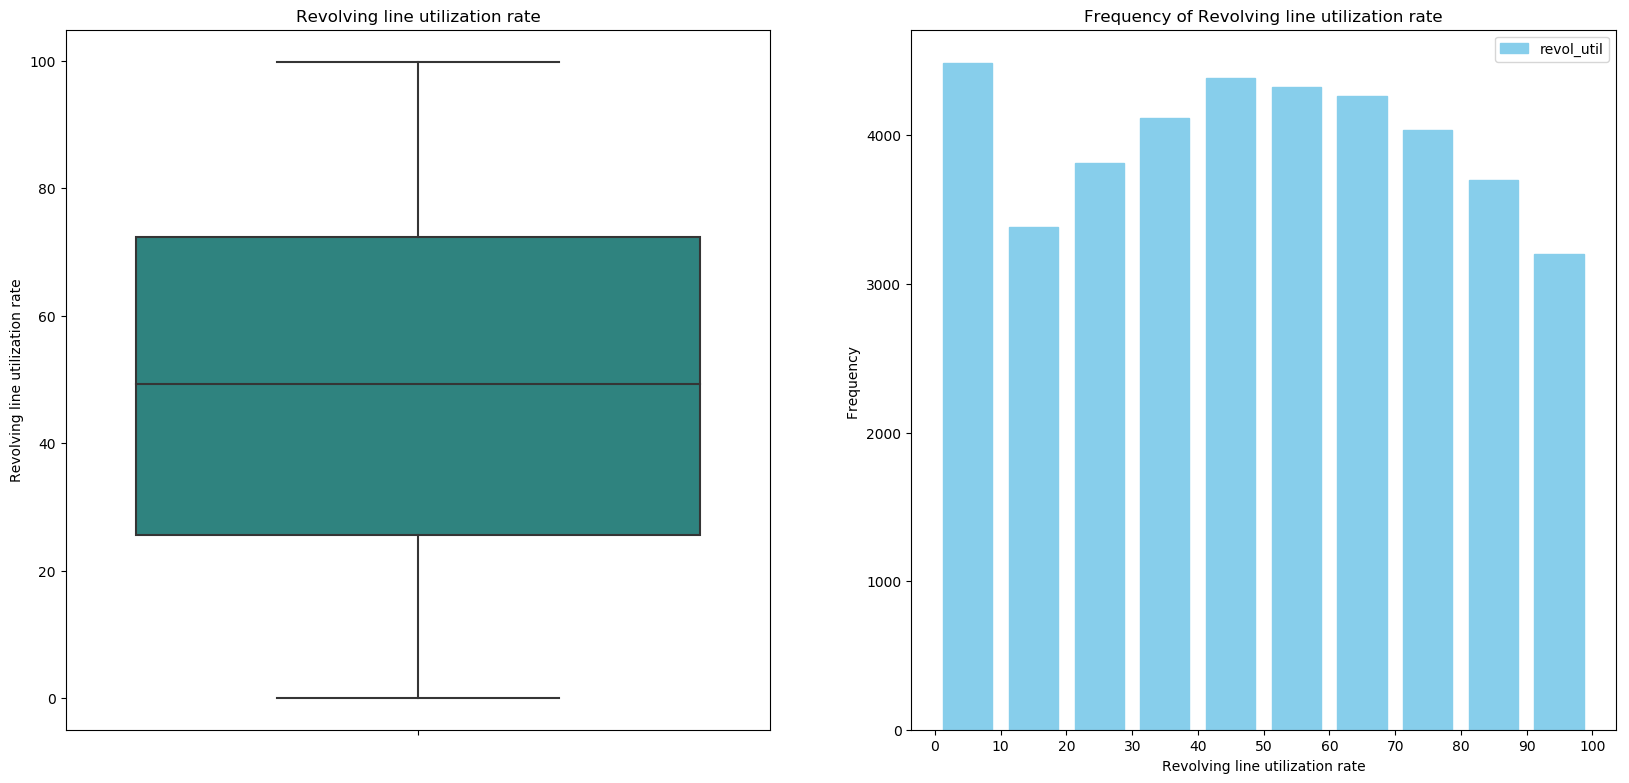

In [28]:
#Revolving line utilization rate(revol_util)

# Ploting revo_util column
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(y=df['revol_util'], palette='viridis')
plt.ylabel('Revolving line utilization rate')
plt.title('Revolving line utilization rate')

#Frequency Chart
revol_util = df['revol_util']
legend = ['revol_util']
plt.subplot(2,2,2)
plt.hist([revol_util], color = "skyblue", ec="skyblue", bins=10, rwidth=0.75)
plt.xlabel("Revolving line utilization rate")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(revol_util), max(revol_util)+10, 10))
plt.legend(legend)
plt.title('Frequency of Revolving line utilization rate')
plt.show()

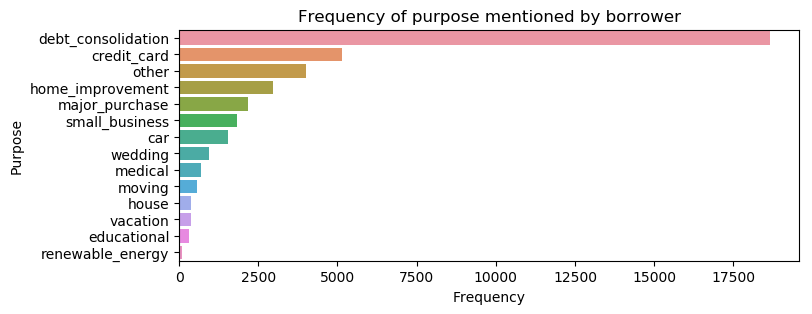

In [29]:
# The Variable purpose is an Unordered Categorical


# Plot purpose for taking loan in a horizontal bar chart 
purpose = pd.DataFrame(df['purpose'].value_counts())
bar_chart(purpose, 'purpose', purpose.index, 8, 3,
               'Frequency of purpose mentioned by borrower', 'Frequency', 'Purpose',
               None,
               False)

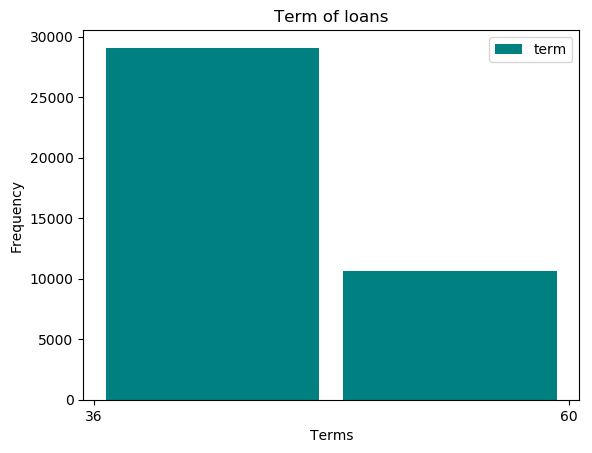

In [30]:
terms = df['term']

legend = ['term']
plt.hist([terms], bins=2, rwidth=0.90, color='teal')
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.xticks(terms.unique())
plt.legend(legend)
plt.title('Term of loans')
plt.show()


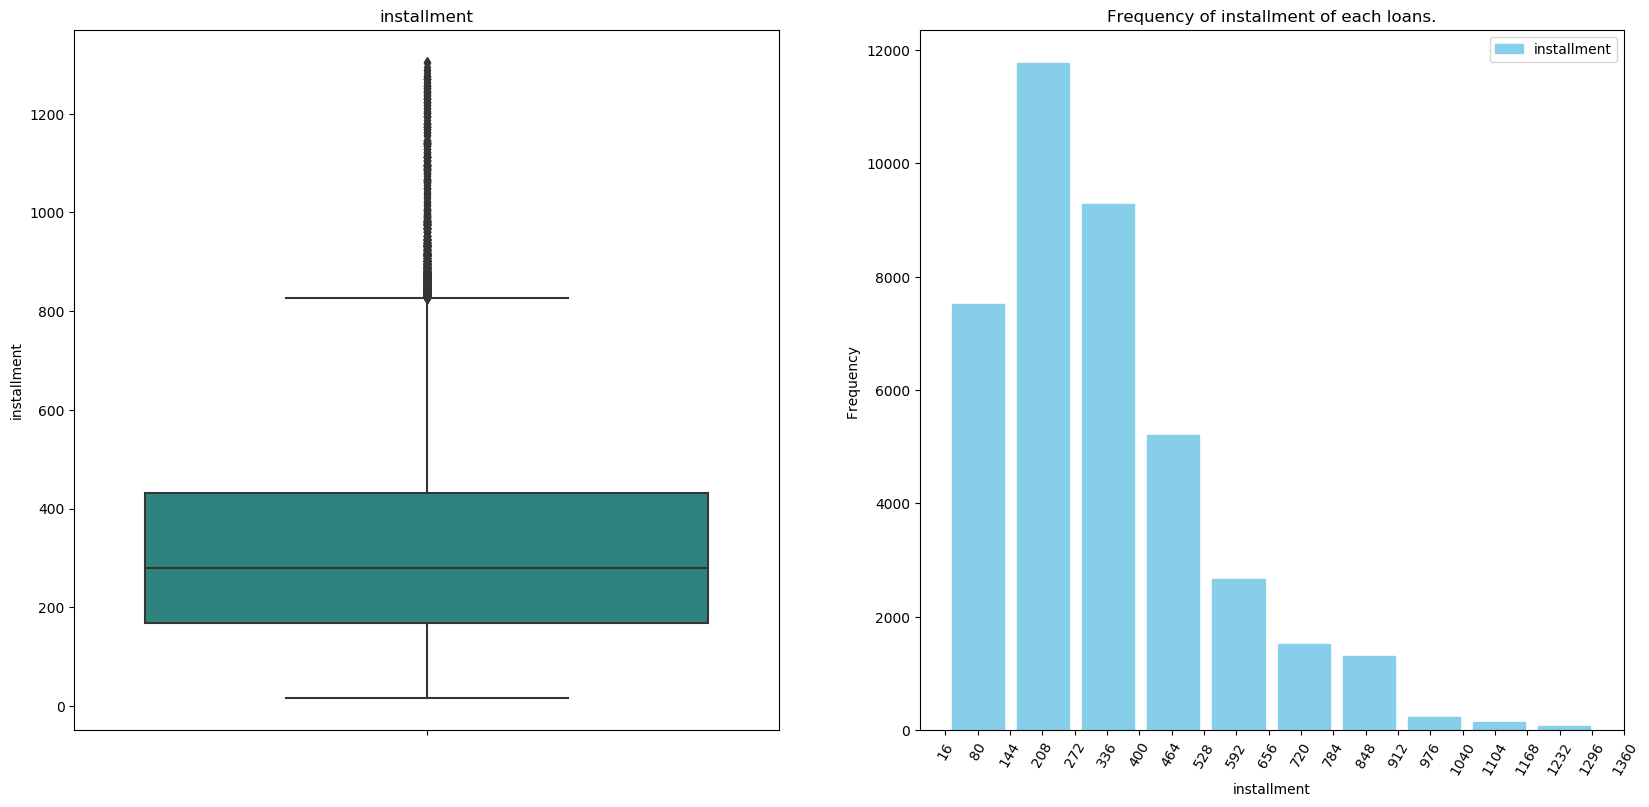

In [31]:
# Plotting the distribution plot of installment to see their distribution
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(y=df['installment'], palette='viridis')
plt.ylabel('installment')
plt.title('installment')

#Frequency Chart
installment = df['installment']
legend = ['installment']
plt.subplot(2,2,2)
plt.hist([installment], color = "skyblue", ec="skyblue", bins=10, rwidth=0.80)
plt.xlabel("installment")
plt.ylabel("Frequency ")
plt.legend(legend)
plt.xticks(np.arange(min(installment), max(installment)+64, 64), rotation=60)
plt.title('Frequency of installment of each loans.')
plt.show()

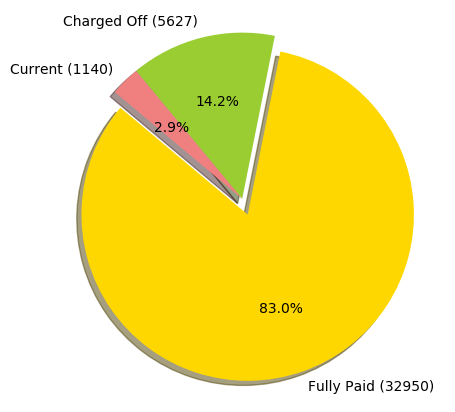

In [32]:
# The Variable loan_status is an Unordered Categorical

loan_status = pd.DataFrame(df['loan_status'].value_counts())

# Data's to plot
chart_label_loan_status = ["Fully Paid (" + str(loan_status.loc['Fully Paid'].values[0]) + ')',
                           "Charged Off (" + str(loan_status.loc['Charged Off'].values[0]) + ')',
                           "Current (" + str(loan_status.loc['Current'].values[0]) + ')']

colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(5, 5))
plt.pie(loan_status, explode=explode, labels=chart_label_loan_status, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [33]:
df['loan_default_status'] = df['loan_status'].apply(lambda x: 'Defaulter' if x == 'Charged Off' else 'Non-Defaulter') 
print('Number of defaulters and Non-Defaulters after merging Current and Fully Paid as Non Defaulter \n',df.groupby('loan_default_status')['loan_default_status'].count(),'\n\n')

Number of defaulters and Non-Defaulters after merging Current and Fully Paid as Non Defaulter 
 loan_default_status
Defaulter         5627
Non-Defaulter    34090
Name: loan_default_status, dtype: int64 




In [34]:
df['interest_rate_bracket'] = df['int_rate'].apply(lambda x :'0-5' if x <=5 else ('5-10' if x<=10 else ('10-15' if x <=15 else ('15-20' if x<=20 else('20-25' if x <=25 else '25+')))))
df[['int_rate','interest_rate_bracket']].head(10)

,int_rate,interest_rate_bracket
0,10.65,10-15
1,15.27,15-20
2,15.96,15-20
3,13.49,10-15
4,12.69,10-15
5,7.90,5-10
6,15.96,15-20
7,18.64,15-20
8,21.28,20-25
9,12.69,10-15


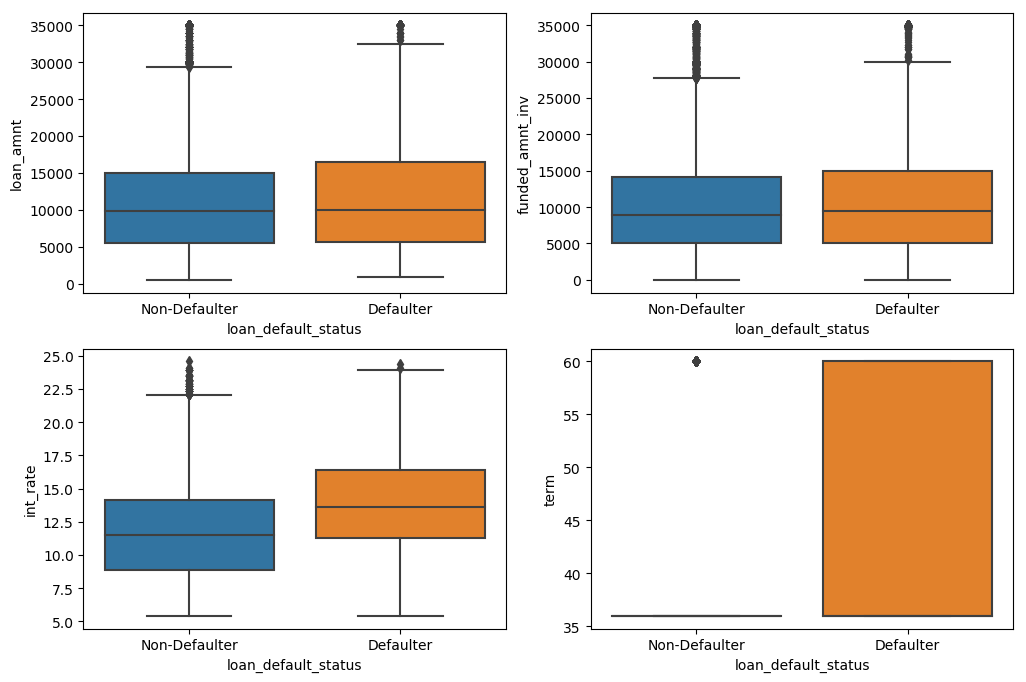

In [35]:
plt.rcdefaults()
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="loan_default_status", y="loan_amnt", data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x="loan_default_status",  y="funded_amnt_inv", data=df)

plt.subplot(2, 2, 3)
sns.boxplot(x="loan_default_status", y="int_rate", data=df)

plt.subplot(2, 2, 4)
sns.boxplot(x="loan_default_status", y="term", data=df)

plt.show()

Get the percentage of defaults for each of  the loan brackets

loan_default_status    Defaulter  Non-Defaulter
interest_rate_bracket                          
10-15                      14.40          85.60
15-20                      23.43          76.57
20-25                      33.94          66.06
5-10                        6.70          93.30

Inference: Nearly 35% of loans in the interest bracket 20-25% have been defaulted followed by 15-20% interest bracket which has defaulted loan of 24%



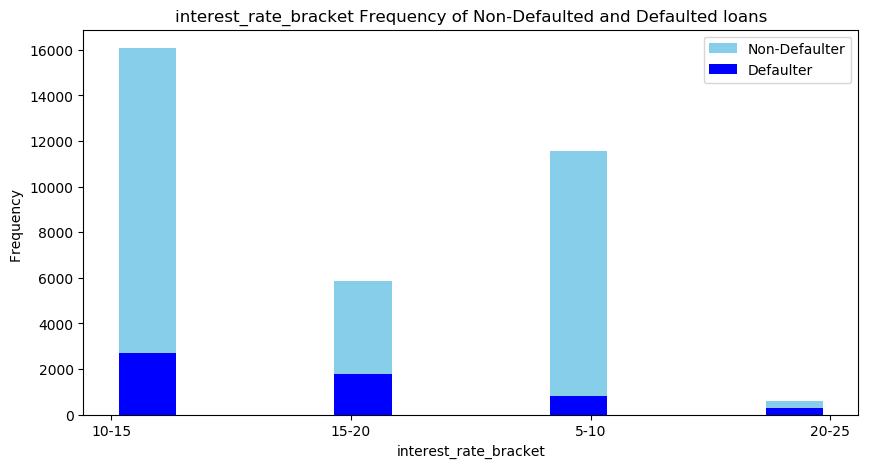

In [46]:
plt.rcdefaults()
print("Get the percentage of defaults for each of  the loan brackets\n")
loan_stat_per_interest_bracket = pd.crosstab(df['interest_rate_bracket'],df['loan_default_status']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
print(loan_stat_per_interest_bracket);

print("\nInference: Nearly 35% of loans in the interest bracket 20-25% have been defaulted followed by 15-20% interest bracket which has defaulted loan of 24%\n")\

#Frequency Chart
emp_length_fp = df[df.loan_default_status == 'Non-Defaulter']['interest_rate_bracket']
emp_length_co = df[df.loan_default_status == 'Defaulter']['interest_rate_bracket']

plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(10, 5))

plt.hist([emp_length_fp], bins=10, rwidth=0.80, color='skyblue')
plt.hist([emp_length_co], bins=10, rwidth=0.80, color='blue')

plt.xlabel("interest_rate_bracket")
plt.ylabel("Frequency ")

plt.legend(df.loan_default_status, loc='upper right')

plt.title('interest_rate_bracket Frequency of Non-Defaulted and Defaulted loans')

plt.show()

# Bi Variate Analysis

In [47]:
#Bivariate Coorelation Matrix
corr = round(df.corr(),2)

corr.style.background_gradient()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,issue_year,issue_mon
id,1,0.14,0.25,0.22,0.08,0.09,0.11,0.01,0.1,-0.01,0.02,-0.02,0.09,-0.01,0.85,0.4
loan_amnt,0.14,1,0.94,0.36,0.31,0.93,0.15,0.27,0.07,-0.03,0.18,-0.05,0.07,-0.04,0.12,0.07
funded_amnt_inv,0.25,0.94,1,0.36,0.31,0.91,0.16,0.25,0.07,-0.04,0.16,-0.05,0.07,-0.04,0.26,0.08
term,0.22,0.36,0.36,1,0.45,0.1,0.11,0.05,0.08,0.01,0.05,0.01,0.07,0.01,0.26,0.06
int_rate,0.08,0.31,0.31,0.45,1,0.28,0.01,0.05,0.11,0.16,0.01,0.1,0.47,0.08,0.06,0.04
installment,0.09,0.93,0.91,0.1,0.28,1,0.12,0.27,0.05,-0.02,0.17,-0.05,0.1,-0.03,0.06,0.04
emp_length,0.11,0.15,0.16,0.11,0.01,0.12,1,0.11,0.05,0.02,0.1,0.06,0.01,0.06,0.12,0.03
annual_inc,0.01,0.27,0.25,0.05,0.05,0.27,0.11,1,-0.12,0.02,0.16,-0.02,0.02,-0.02,0.01,0.01
dti,0.1,0.07,0.07,0.08,0.11,0.05,0.05,-0.12,1,-0.03,0.29,-0,0.28,0.01,0.1,0.02
delinq_2yrs,-0.01,-0.03,-0.04,0.01,0.16,-0.02,0.02,0.02,-0.03,1,0.01,0.01,-0.04,0,-0,-0.01


In [49]:
# Creating data frames for Non-Defaulter and Defaulter
fully_paid_df = pd.DataFrame(df[df.loan_default_status == 'Non-Defaulter']).reset_index()
charged_off_df = pd.DataFrame(df[df.loan_default_status == 'Defaulter']).reset_index()

                 loan_amnt  funded_amnt_inv
loan_amnt         1.000000         0.907129
funded_amnt_inv   0.907129         1.000000


<Figure size 2000x2500 with 0 Axes>

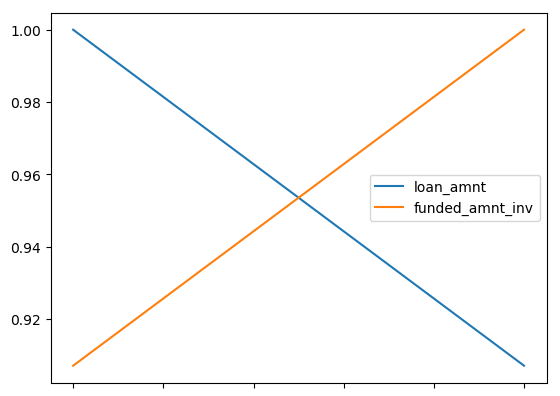

The loan amont and funded amount has higher corelation coeffeciant in the case of Defaulted loans.


In [56]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20, 25))

loan_fund_amnt = pd.DataFrame({'loan_amnt': charged_off_df['loan_amnt'], 'funded_amnt_inv': charged_off_df['funded_amnt_inv']})
corrcoefficiant = pearsonr(loan_fund_amnt['loan_amnt'], loan_fund_amnt['funded_amnt_inv'])
corr = loan_fund_amnt.corr()
print(corr)
corr.plot(kind='line', subplots=False)
plt.show()

print('The loan amont and funded amount has higher corelation coeffeciant in the case of Defaulted loans.')

                 loan_amnt  funded_amnt_inv
loan_amnt         1.000000         0.946734
funded_amnt_inv   0.946734         1.000000


<Figure size 2000x2500 with 0 Axes>

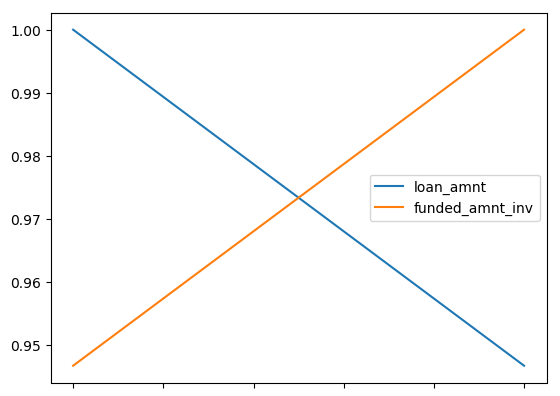

The loan amont and funded amount has higher corelation coeffeciant in the case of Defaulted loans.


In [57]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.
plt.figure(figsize=(20, 25))

loan_fund_amnt = pd.DataFrame({'loan_amnt': fully_paid_df['loan_amnt'], 'funded_amnt_inv': fully_paid_df['funded_amnt_inv']})
corrcoefficiant = pearsonr(loan_fund_amnt['loan_amnt'], loan_fund_amnt['funded_amnt_inv'])
corr = loan_fund_amnt.corr()
print(corr)
corr.plot(kind='line', subplots=False)
plt.show()

print('The loan amont and funded amount has higher corelation coeffeciant in the case of Defaulted loans.')

# Verification status vs loan status

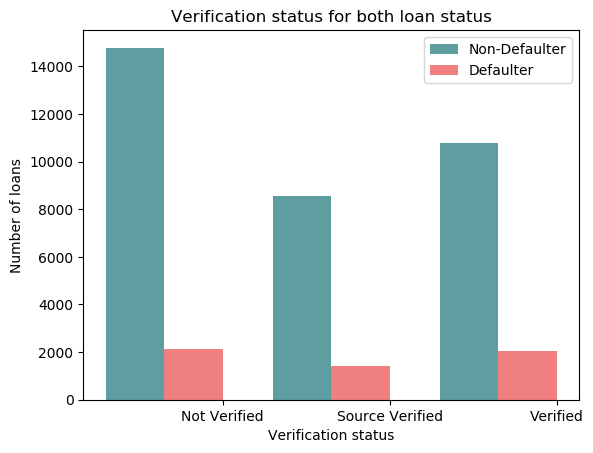

In [58]:
plt.rcdefaults() # Restore the rc params from Matplotlib’s internal defaults.

verification_status_fp = fully_paid_df.groupby(fully_paid_df.verification_status).size()
verification_status_co = charged_off_df.groupby(charged_off_df.verification_status).size()

ind = np.arange(max(len(verification_status_fp), len(verification_status_co)))  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ind-width, verification_status_fp, width, color='cadetblue', label='Non-Defaulter')
ax.bar(ind, verification_status_co, width, color='lightcoral', label='Defaulter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (verification_status_fp.index) )
plt.xlabel('Verification status')
plt.ylabel('Number of loans')
plt.title('Verification status for both loan status')
plt.legend()

plt.show()